# Part 1:

1. Define/choose a network/graph topology
    - Begin with very basic graph, 4 nodes, colour with a minimum of 2 colours
    - Then build a more complex graph
    - Small world graph maybe? Tree topology?
2. Randomly assign colours to each node (Note: chose suitable number of colours)
3. Run experiments to see if correct colouring of the graph can be reached.
4. Count the number of conflicts over time
5. Deliverable: description of approach and key parameters; experiments and results; link to code


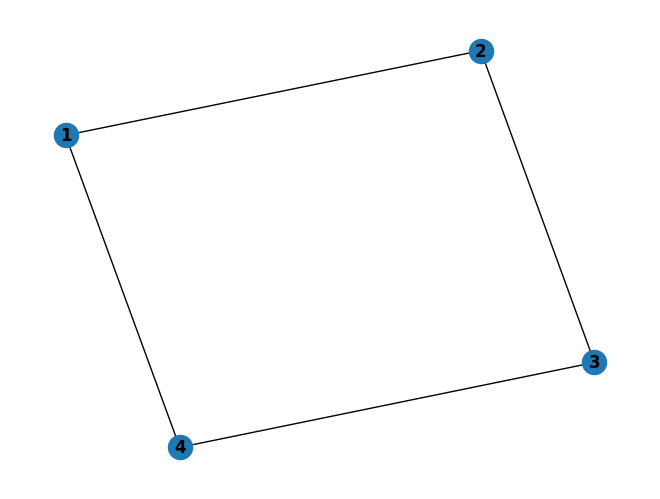

In [259]:
# Create a graph with 4 nodes and 4 edges

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4])

G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


In [260]:

# define a list of possible hexvals for colours

hexvals = [
    '#FFFFFF', '#C0C0C0', '#808080', '#000000', '#FF0000', '#800000',
    '#FFFF00', '#808000', '#00FF00', '#008000', '#00FFFF', '#008080',
    '#0000FF', '#000080', '#FF00FF', '#800080', '#baeed2', '#6dacfc',
    '#a83a18', '#af4113', '#481288', '#715f3c', '#e0f804', '#fb9274',
    '#a7c99e', '#38db5a'
]

#define a list to store the fitness

fitness_list = []  

In [261]:
# loop through each node in the graph, and assign a random colour

import random

# I onyl want to allow two colours for this graph, so I will create a list of two colours from my hexvals

colors = random.sample(hexvals, 2)

print(colors)
print(hexvals)

def assign_random_colors(G, colors):
    for node in G.nodes():
        r = random.random()
        if r < 0.5:
            G.nodes[node]['color'] = colors[0]
        else:
            G.nodes[node]['color'] = colors[1]

    return G


['#FF0000', '#481288']
['#FFFFFF', '#C0C0C0', '#808080', '#000000', '#FF0000', '#800000', '#FFFF00', '#808000', '#00FF00', '#008000', '#00FFFF', '#008080', '#0000FF', '#000080', '#FF00FF', '#800080', '#baeed2', '#6dacfc', '#a83a18', '#af4113', '#481288', '#715f3c', '#e0f804', '#fb9274', '#a7c99e', '#38db5a']


In [262]:
# define the fitness of a node as the number of conflicting neighbours

def fitness(G, node):
    # get the colour of the node
    color = G.nodes[node]['color']
    # get the neighbours of the node
    neighbours = G.neighbors(node)
    # count the number of neighbours with the same colour
    count = 0
    for neighbour in neighbours:
        if G.nodes[neighbour]['color'] == color:
            count += 1
    return count

In [263]:
# overall graph fitness

def overall_fitness(G):
    fitnesses = [fitness(G, node) for node in G.nodes()]
    return sum(fitnesses)


In [264]:
import random
# define a function to change a node's colour randomly
# note that in bigger graph, this should be randomly picking a different colour
# rather than just switching between the two colours

def change_random(G):
    # get a random node from the graph
    random_node = random.choice(list(G.nodes()))
    # change the colour of the random node using index of the colours list
    if G.nodes[random_node]['color'] == colors[0]:
        G.nodes[random_node]['color'] = colors[1]
    else:
        G.nodes[random_node]['color'] = colors[0]
    
    return G

In [265]:
def run_algorithm(G, colors, max_iter):
    # assign random colours
    G = assign_random_colors(G, colors)
    print("Random colors assigned.")
    
    # get the initial fitness
    best_fitness = overall_fitness(G)
    print("Initial fitness:", best_fitness)
    fitness_list.append(best_fitness)
    
    # loop through the max number of iterations
    for i in range(max_iter):

        # print worst node fitness
        fitnesses = {node: fitness(G, node) for node in G.nodes()}
        print("Worst node fitness:", min(fitnesses, key=fitnesses.get), min(fitnesses.values()))


        # change the worst node
        G = change_random(G)
        print("Iteration", i+1, "completed.")

        # get the new fitness
        new_fitness = overall_fitness(G)
        fitness_list.append(new_fitness)
        print("New fitness:", new_fitness)
        
        # if the new fitness is better, update the best fitness
        if new_fitness < best_fitness:
            best_fitness = new_fitness
            print("New best fitness:", best_fitness)
        
        # if we have reached the last iteration, and fitness is not 0, print (FAILED)
        if i == max_iter - 1 and best_fitness != 0:
            print("FAILED TO FIND SOLUTION.")
        # if the fitness is 0, we have found a solution
        if best_fitness == 0:
            print("Solution found.")
            break
    
    return G


Random colors assigned.
Initial fitness: 4
Worst node fitness: 4 0
Iteration 1 completed.
New fitness: 0
New best fitness: 0
Solution found.


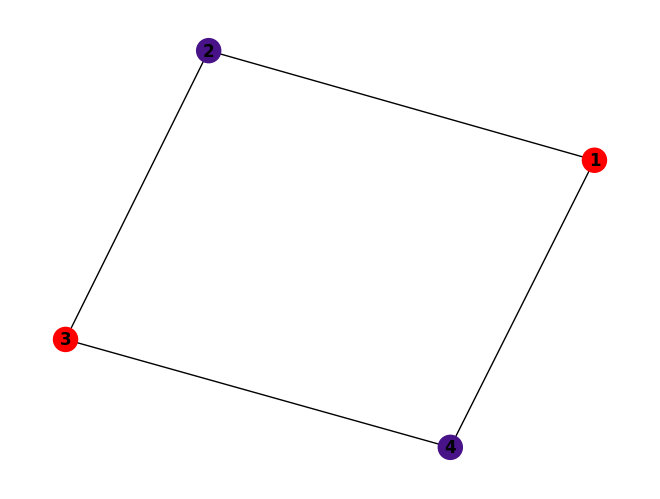

In [266]:
# run the algorithm
G = run_algorithm(G, colors, 100)

# draw g
nx.draw(G, with_labels=True, font_weight='bold', node_color=[G.nodes[node]['color'] for node in G.nodes()])

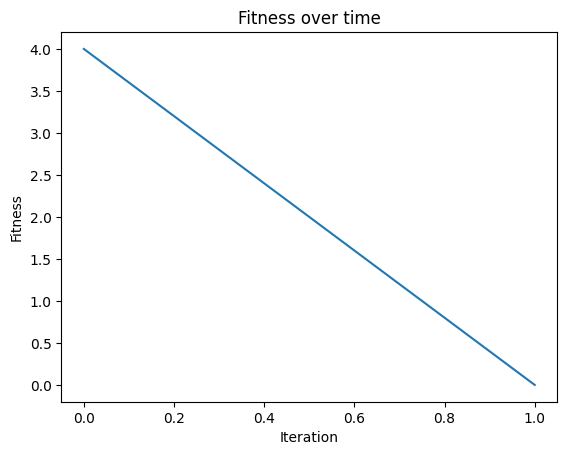

In [267]:
# plot fittness over time

import matplotlib.pyplot as plt

plt.plot(fitness_list)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness over time')
plt.show()


# Next Step, Implementing this on a larger graph:

I will reuse most of the functions.

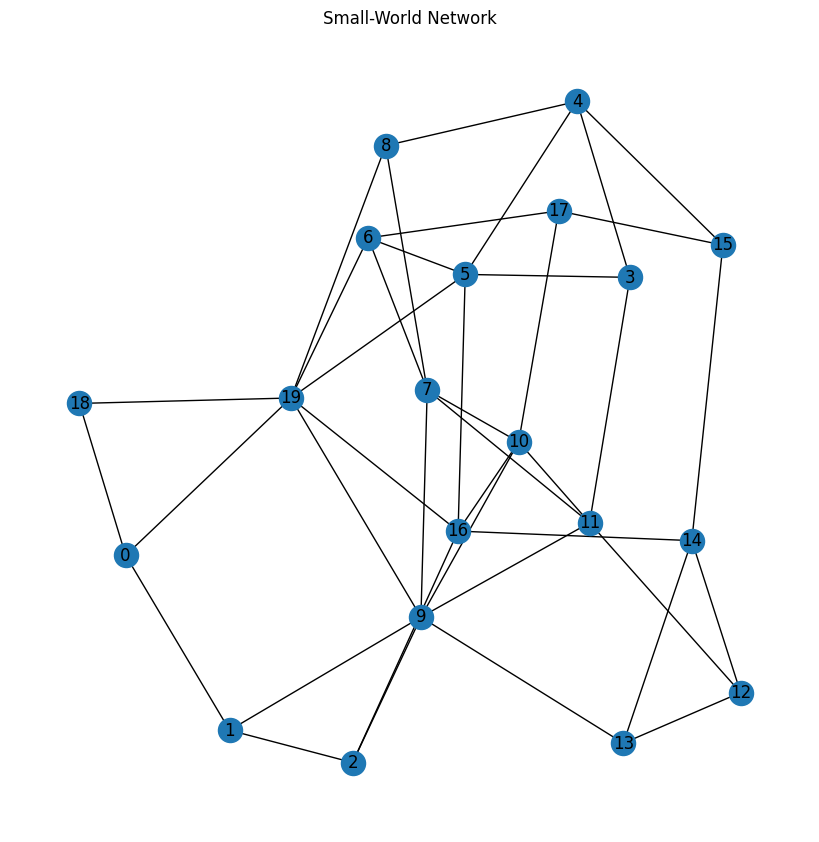

In [268]:
import networkx as nx
import matplotlib.pyplot as plt

n = 20
k = 4
p = 0.5
seed = 42

# generate small-world graph
small_world_graph = nx.watts_strogatz_graph(n, k, p)

plt.figure(figsize=(8, 8))
nx.draw(small_world_graph, with_labels=True)
plt.title('Small-World Network')
plt.show()


In [269]:
import random
# define a function to change a node's colour randomly

def change_random_sw(G, colors):
    # get a random node from the graph
    random_node = random.choice(list(G.nodes()))
    # get the neighbours of the random node
    neighbours = list(G.neighbors(random_node))
    
    # get the available colours that are not in the neighbours
    available_colors = [color for color in colors if color not in [G.nodes[neighbour]['color'] for neighbour in neighbours]]
    
    # if there are enough available colors, change the colour of the random node
    if len(available_colors) > 0:
        G.nodes[random_node]['color'] = random.choice(available_colors)
    else:
        # if there are no available colours, change the colour to a random colour
        G.nodes[random_node]['color'] = random.choice(colors)
    
    return G

In [270]:
def run_algorithm_sw(G, colors, max_iter, hex_options):
    # assign random colours
    G = assign_random_colors(G, colors)
    print("Random colors assigned.")
    
    # get the initial fitness
    best_fitness = overall_fitness(G)
    print("Initial fitness:", best_fitness)
    fitness_list.append(best_fitness)
    
    # loop through the max number of iterations
    for i in range(max_iter):

        # print worst node fitness
        fitnesses = {node: fitness(G, node) for node in G.nodes()}
        print("Worst node fitness:", min(fitnesses, key=fitnesses.get), min(fitnesses.values()))

        # change the worst node
        G = change_random_sw(G, colors)
        print("Iteration", i+1, "completed.")

        # get the new fitness
        new_fitness = overall_fitness(G)
        print("New fitness:", new_fitness)
        fitness_list.append(new_fitness)
        
        # if the new fitness is better, update the best fitness
        if new_fitness < best_fitness:
            best_fitness = new_fitness
            print("New best fitness:", best_fitness)

        '''# if we reached the maximum number of iterations, and no solution was found add a colour to the list
        if i == max_iter - 1:
            # if color_options is empty, print a message and break the loop
            if len(hex_options) == 0:
                print("No solution found.")
                break
            new_color = hex_options.pop(0)
            colors.append(new_color)
            print("New colour added:", new_color)
            # call algorithm again
            G = run_algorithm_sw(G, colors, max_iter, hex_options)
'''
        # if the fitness is 0, we have found a solution
        if best_fitness == 0:
            print("Solution found.")
            break
    
    return G


Random colors assigned.
Initial fitness: 38
Worst node fitness: 13 0
Iteration 1 completed.
New fitness: 34
New best fitness: 34
Worst node fitness: 13 0
Iteration 2 completed.
New fitness: 32
New best fitness: 32
Worst node fitness: 13 0
Iteration 3 completed.
New fitness: 28
New best fitness: 28
Worst node fitness: 13 0
Iteration 4 completed.
New fitness: 36
Worst node fitness: 2 0
Iteration 5 completed.
New fitness: 34
Worst node fitness: 2 0
Iteration 6 completed.
New fitness: 28
Worst node fitness: 2 0
Iteration 7 completed.
New fitness: 28
Worst node fitness: 2 0
Iteration 8 completed.
New fitness: 28
Worst node fitness: 2 0
Iteration 9 completed.
New fitness: 28
Worst node fitness: 2 0
Iteration 10 completed.
New fitness: 26
New best fitness: 26
Worst node fitness: 2 0
Iteration 11 completed.
New fitness: 26
Worst node fitness: 2 0
Iteration 12 completed.
New fitness: 24
New best fitness: 24
Worst node fitness: 2 0
Iteration 13 completed.
New fitness: 22
New best fitness: 22
Wor

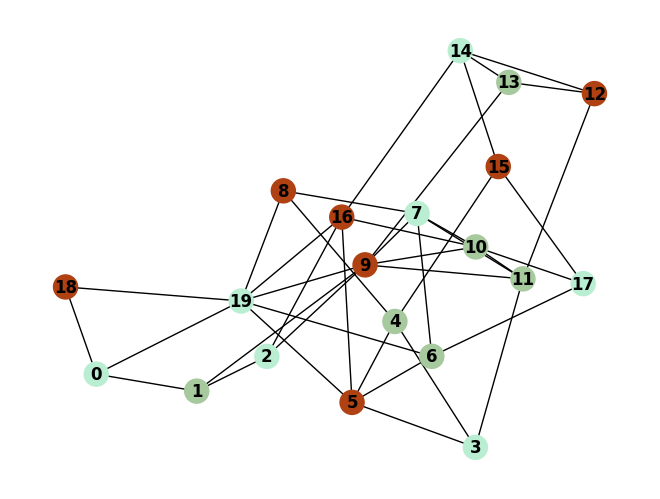

In [271]:
# redefine the number of allowed colours
colors = random.sample(hexvals, 3)

# redefine the fitness list
fitness_list = []

# run the algorithm
small_world_graph = run_algorithm_sw(small_world_graph, colors, 100, hexvals)

# draw small_world_graph
nx.draw(small_world_graph, with_labels=True, font_weight='bold', node_color=[small_world_graph.nodes[node]['color'] for node in small_world_graph.nodes()])

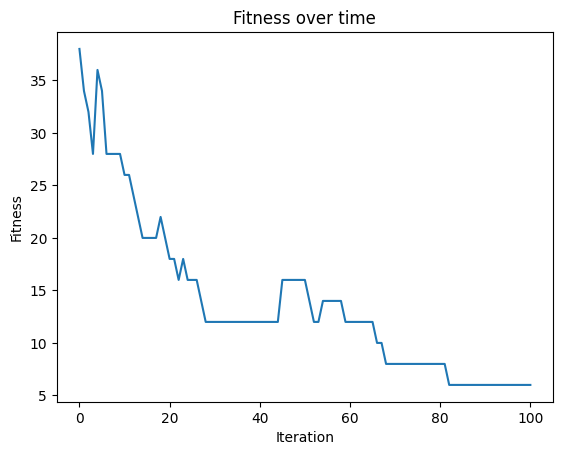

In [272]:
# plot fittness over time

import matplotlib.pyplot as plt

plt.plot(fitness_list)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness over time')
plt.show()


# Step 3: Attempt on large small world graph

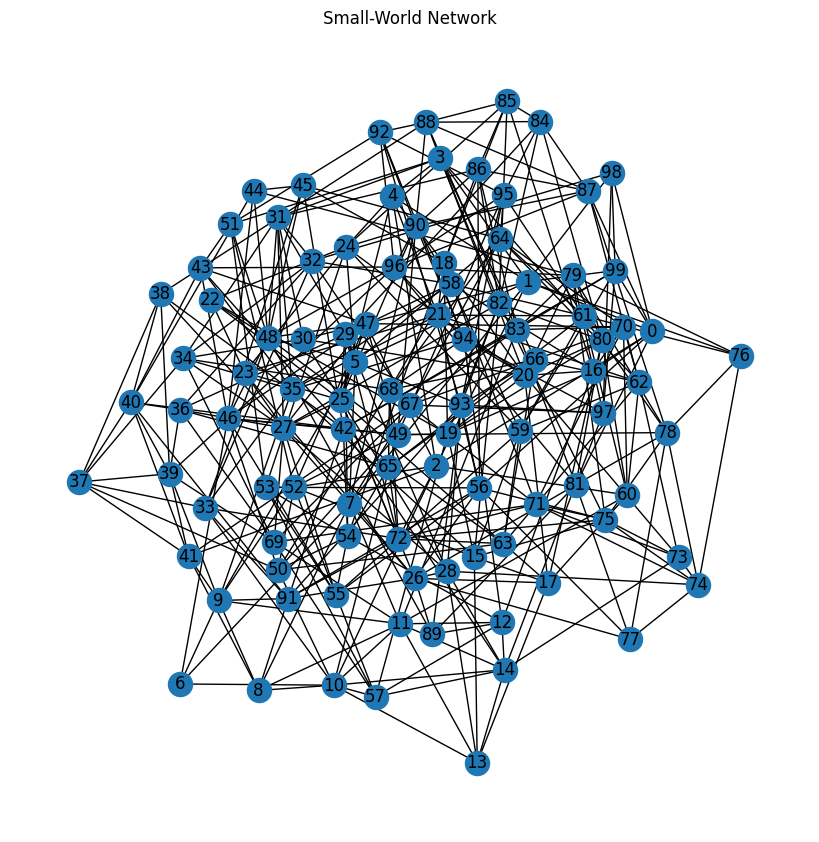

In [273]:
# create new sw graph, with 100 nodes, 4 neighbours, and p=0.5
n = 100
k = 9
p = 0.5
seed = 42

# generate small-world graph
small_world_graph = nx.watts_strogatz_graph(n, k, p)

plt.figure(figsize=(8, 8))
nx.draw(small_world_graph, with_labels=True)
plt.title('Small-World Network')
plt.show()


Random colors assigned.
Initial fitness: 388
Worst node fitness: 22 1
Iteration 1 completed.
New fitness: 376
New best fitness: 376
Worst node fitness: 90 0
Iteration 2 completed.
New fitness: 368
New best fitness: 368
Worst node fitness: 26 0
Iteration 3 completed.
New fitness: 362
New best fitness: 362
Worst node fitness: 26 0
Iteration 4 completed.
New fitness: 356
New best fitness: 356
Worst node fitness: 14 0
Iteration 5 completed.
New fitness: 352
New best fitness: 352
Worst node fitness: 6 0
Iteration 6 completed.
New fitness: 350
New best fitness: 350
Worst node fitness: 6 0
Iteration 7 completed.
New fitness: 344
New best fitness: 344
Worst node fitness: 6 0
Iteration 8 completed.
New fitness: 336
New best fitness: 336
Worst node fitness: 6 0
Iteration 9 completed.
New fitness: 328
New best fitness: 328
Worst node fitness: 6 0
Iteration 10 completed.
New fitness: 320
New best fitness: 320
Worst node fitness: 6 0
Iteration 11 completed.
New fitness: 310
New best fitness: 310
Wo

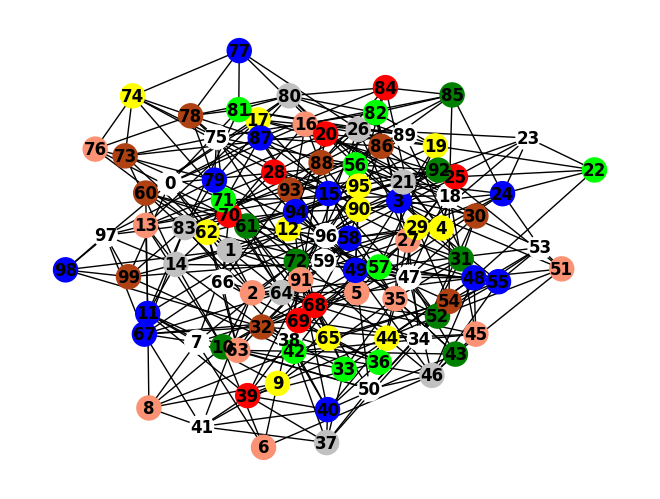

In [274]:

# redefine hexvals
hexvals = [
    '#FFFFFF', '#C0C0C0', '#808080', '#000000', '#FF0000', '#800000',
    '#FFFF00', '#808000', '#00FF00', '#008000', '#00FFFF', '#008080',
    '#0000FF', '#000080', '#FF00FF', '#800080', '#baeed2', '#6dacfc',
    '#a83a18', '#af4113', '#481288', '#715f3c', '#e0f804', '#fb9274',
    '#a7c99e', '#38db5a'
]
           

# redefine the number of allowed colours
colors = random.sample(hexvals, 9)

# redefine the fitness list
fitness_list = []

# run the algorithm
small_world_graph = run_algorithm_sw(small_world_graph, colors, 300, hexvals)

# draw small_world_graph
nx.draw(small_world_graph, with_labels=True, font_weight='bold', node_color=[small_world_graph.nodes[node]['color'] for node in small_world_graph.nodes()])

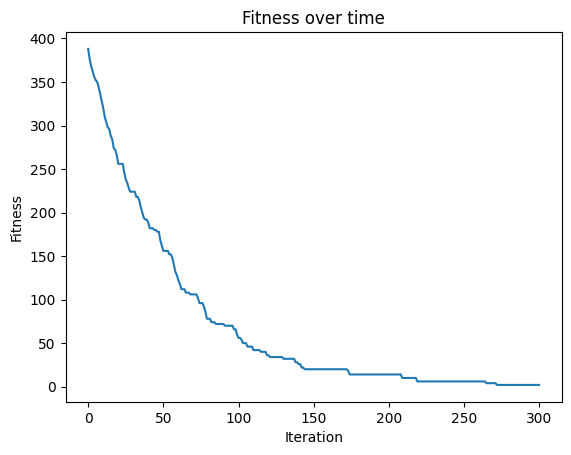

In [275]:
# plot fittness over time

import matplotlib.pyplot as plt

plt.plot(fitness_list)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness over time')
plt.show()

